Train folders: ['A', 'B', 'C', 'D', 'del'] ...
Test files: ['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg'] ...
Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Train samples: 69600
Validation samples: 17400
Test samples: 28


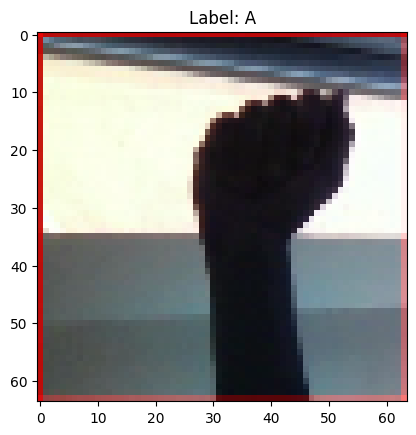

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths (update username if needed)
base_path = r"C:\Users\Others\OneDrive\Desktop\ASL"
train_path = os.path.join(base_path, "asl_alphabet_train")
test_path = os.path.join(base_path, "asl_alphabet_test")

# Check folder contents
print("Train folders:", os.listdir(train_path)[:5], "...")  # first 5 folders
print("Test files:", os.listdir(test_path)[:5], "...")      # first 5 test images

# Image size for CNN
img_size = 64

# Data generator for loading training images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Load test images manually
test_images = []
test_labels = []
for file in os.listdir(test_path):
    img_path = os.path.join(test_path, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    test_images.append(img)
    test_labels.append(file.split("_")[0])  # label from filename e.g. "A_test.jpg" -> "A"

test_images = np.array(test_images) / 255.0

print("Train samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)
print("Test samples:", len(test_images))

# Show one sample
plt.imshow(test_images[0])
plt.title(f"Label: {test_labels[0]}")
plt.show()


In [3]:
# Function to load and preprocess images
def load_images_from_folder(folder, img_size):
    data = []
    labels = []
    classes = os.listdir(folder)
    for label, class_name in enumerate(classes):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for file in os.listdir(class_folder):
                img_path = os.path.join(class_folder, file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    img = img / 255.0   # normalize
                    data.append(img)
                    labels.append(label)
    return np.array(data), np.array(labels), classes

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),   # or 128x128 if you want more detail
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = 29   

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,501 (4.89 MB)

 Trainable params: 1,281,053 (4.89 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


c:\Users\Others\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1188s 545ms/step - accuracy: 0.5590 - loss: 1.4373 - val_accuracy: 0.6526 - val_loss: 1.2704
Epoch 2/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 301s 139ms/step - accuracy: 0.8829 - loss: 0.3489 - val_accuracy: 0.7472 - val_loss: 1.0866
Epoch 3/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 308s 142ms/step - accuracy: 0.9446 - loss: 0.1740 - val_accuracy: 0.6318 - val_loss: 2.0792
Epoch 4/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 305s 140ms/step - accuracy: 0.9620 - loss: 0.1249 - val_accuracy: 0.8117 - val_loss: 0.9661
Epoch 5/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 315s 145ms/step - accuracy: 0.9717 - loss: 0.0952 - val_accuracy: 0.7552 - val_loss: 1.7225
Epoch 6/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 302s 139ms/step - accuracy: 0.9776 - loss: 0.0784 - val_accuracy: 0.7713 - val_loss: 1.1844
Epoch 7/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 299s 137ms/step - accuracy: 0.9796 - loss: 0.0773 - val_accuracy: 0.7315 - val_loss: 1.6204
Epoch 8/20
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 304s 140ms/step - a

In [9]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


544/544 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7718 - loss: 2.0746
Validation Accuracy: 77.18%
Validation Loss: 2.0746


In [10]:
import numpy as np
import cv2
import os

test_images = []
test_labels = []
for file in os.listdir(test_path):   # test_path should be asl_alphabet_test folder
    img_path = os.path.join(test_path, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    test_images.append(img / 255.0)  # normalize
    test_labels.append(file.split("_")[0])  # label from filename e.g. A_test.jpg -> "A"

test_images = np.array(test_images)

# Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map back to class labels
class_indices = train_generator.class_indices  # dict {label: index}
labels_map = {v:k for k,v in class_indices.items()}  # reverse dict
predicted_labels = [labels_map[idx] for idx in predicted_classes]

print("Predicted labels:", predicted_labels)
print("True labels:", test_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Predicted labels: ['Z', 'B', 'C', 'D', 'T', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'J', 'S', 'N', 'O', 'P', 'Q', 'R', 'space', 'Q', 'Q', 'B', 'W', 'W', 'Q', 'J', 'Q']
True labels: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'nothing', 'N', 'O', 'P', 'Q', 'R', 'space', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


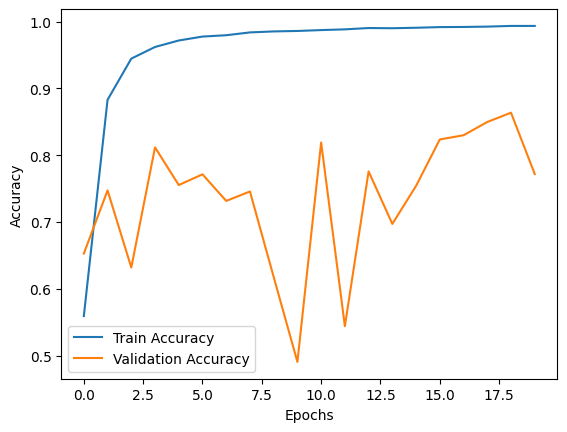

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


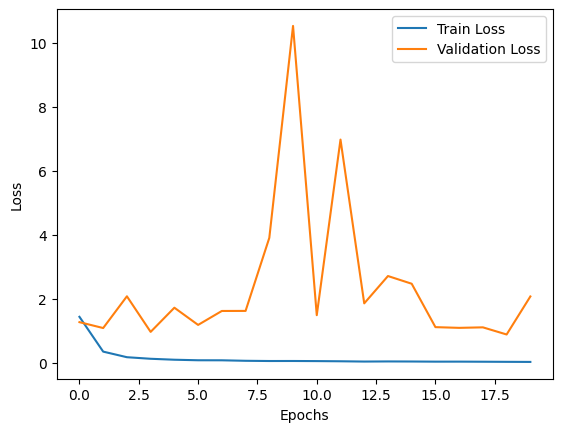

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Save entire model
model.save("asl_cnn_model.h5")
print("Model saved as asl_cnn_model.h5")


Model saved as asl_cnn_model.h5
